In [1]:
#グラフを描画する

In [2]:
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import ast
home_directory = os.path.expanduser('~')
onedrive_folder_name = 'OneDrive'
onedrive_path = os.path.join(home_directory, onedrive_folder_name)
take_directory = os.path.join(onedrive_path,'CODES', 'konishi_AutoEncoder', 'AutoEncoder_data_pre','texts') 

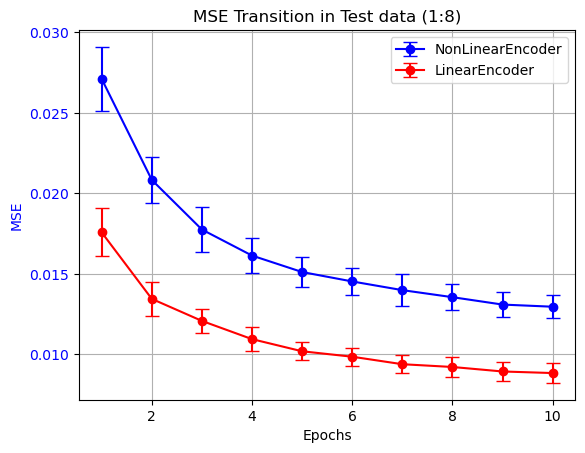

In [3]:
#12/27

#---------------------------------------------------------------------------------
file_name1 = 'MNIST_NL1-8_list.csv'##
full_path1 = os.path.join(take_directory, file_name1)

# CSVファイルからデータを読み込む

all_loss_test1 = []
with open(full_path1, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # 行内の各要素を評価してリストに追加
        for element in row:
            try:
                data = eval(element)  # 各要素をリストとして評価
                all_loss_test1.append(data)
            except Exception as e:
                print(f"Error evaluating element: {element} -> {e}")

# データを文字列から数値リストに変換  # 文字列をリストに変換
all_loss_test1 = np.array(all_loss_test1)  # NumPy配列に変換

# 各エポックごとの平均値と標準偏差を計算
mean_loss1 = np.mean(all_loss_test1, axis=0)
std_loss1 = np.std(all_loss_test1, axis=0)

#---------------------------------------------------------------------------------

#file2
file_name2 = 'MNIST_L1-8_list.csv'##
full_path2 = os.path.join(take_directory, file_name2)

# CSVファイルからデータを読み込む
all_loss_test2 = []
with open(full_path2, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # 行内の各要素を評価してリストに追加
        for element in row:
            try:
                data = eval(element)  # 各要素をリストとして評価
                all_loss_test2.append(data)
            except Exception as e:
                print(f"Error evaluating element: {element} -> {e}")

# データを文字列から数値リストに変換  # 文字列をリストに変換
all_loss_test2 = np.array(all_loss_test2)  # NumPy配列に変換


# 各エポックごとの平均値と標準偏差を計算
mean_loss2 = np.mean(all_loss_test2, axis=0)
std_loss2 = np.std(all_loss_test2, axis=0)

#-------------------------------------------------------------------------------------

# グラフの描画
epochs = range(1, len(mean_loss1) + 1)  # エポック範囲

fig, ax1 = plt.subplots()
# エラーバー付きのプロット
ax1.errorbar(
    x=epochs, y=mean_loss1, yerr=std_loss1,
    fmt='-o', color='blue', ecolor='blue', capsize=5, label='NonLinearEncoder'
)
ax1.errorbar(
    x=epochs, y=mean_loss2, yerr=std_loss2,
    fmt='-o', color='red', ecolor='red', capsize=5, label='LinearEncoder'
)

# グラフのラベルとタイトルの設定
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.title('MSE Transition in Test data (1:8)')
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()

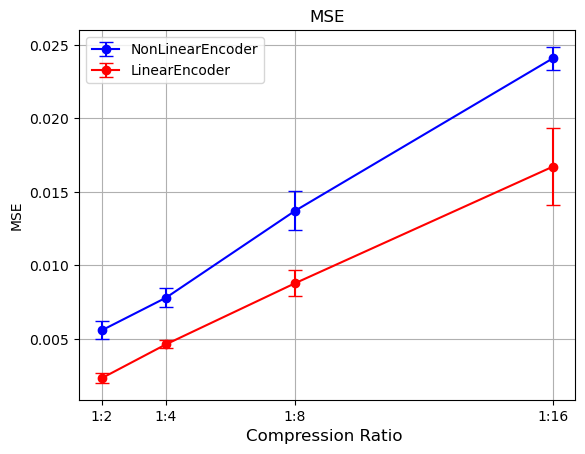

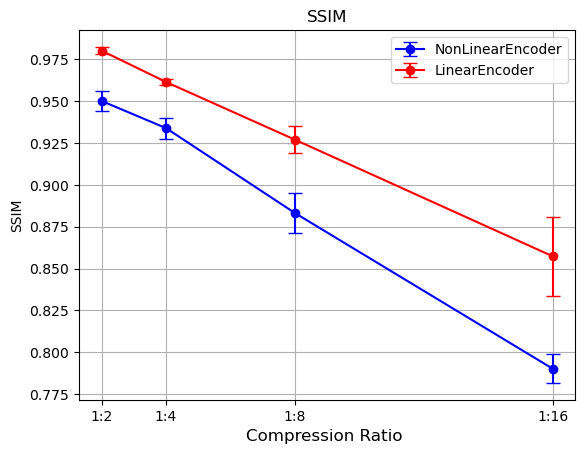

In [4]:
# CSVファイルのパス
file_name = 'MNIST_VCR_NL_list.csv'
full_path = os.path.join(take_directory, file_name)

# CSVファイルからデータを読み込む
with open(full_path, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# 各行を評価してリスト形式に変換
All_last_MSEs_ = np.array([eval(row) for row in rows[0]])  # 1行目がMSEデータ
All_last_SSIMs_ = np.array([eval(row) for row in rows[1]])  # 2行目がSSIMデータ

# NumPy配列に変換
All_last_MSEs_ = np.array(All_last_MSEs_)
All_last_SSIMs_ = np.array(All_last_SSIMs_)

# データを2次元配列に変換（必要に応じて）
MSE_means = np.mean(All_last_MSEs_, axis=1)  # 各 leverage に対する平均
MSE_stds = np.std(All_last_MSEs_, axis=1)   # 各 leverage に対する標準偏差
SSIM_means = np.mean(All_last_SSIMs_, axis=1)  # 各 leverage に対する平均
SSIM_stds = np.std(All_last_SSIMs_, axis=1)   # 各 leverage に対する標準偏差

#-------------------------------------------------------------------------------------
# CSVファイルのパス
file_name = 'MNIST_VCR_L_list.csv'
full_path = os.path.join(take_directory, file_name)

# CSVファイルからデータを読み込む
with open(full_path, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# 各行を評価してリスト形式に変換
All_last_MSEs_2 = np.array([eval(row) for row in rows[0]])  # 1行目がMSEデータ
All_last_SSIMs_2 = np.array([eval(row) for row in rows[1]])  # 2行目がSSIMデータ

# NumPy配列に変換
All_last_MSEs_2 = np.array(All_last_MSEs_2)
All_last_SSIMs_2 = np.array(All_last_SSIMs_2)

# データを2次元配列に変換（必要に応じて）
MSE_means2 = np.mean(All_last_MSEs_2, axis=1)  # 各 leverage に対する平均
MSE_stds2 = np.std(All_last_MSEs_2, axis=1)   # 各 leverage に対する標準偏差
SSIM_means2 = np.mean(All_last_SSIMs_2, axis=1)  # 各 leverage に対する平均
SSIM_stds2 = np.std(All_last_SSIMs_2, axis=1)   # 各 leverage に対する標準偏差

#-------------------------------------------------------------------------------------

# leverageの範囲 (1:2, 1:4, ..., 1:16)
leverages = [2, 4, 8, 16]


# MSEのグラフ
fig1, ax1 = plt.subplots()
ax1.errorbar(
    x=leverages, y=MSE_means, yerr=MSE_stds,
    fmt='-o', color='blue', ecolor='blue', capsize=5, label='NonLinearEncoder'
)
ax1.errorbar(
    x=leverages, y=MSE_means2, yerr=MSE_stds2,
    fmt='-o', color='red', ecolor='red', capsize=5, label='LinearEncoder'
)

ax1.set_xlabel('Compression Ratio ', fontsize=12)
ax1.set_xticks(leverages)
ax1.set_xticklabels(["1:%d" % leverage for leverage in leverages], fontsize=10)
ax1.set_ylabel('MSE')
ax1.set_title('MSE')
ax1.legend()
ax1.grid(True)
plt.show()

# SSIMのグラフ
fig2, ax2 = plt.subplots()
ax2.errorbar(
    x=leverages, y=SSIM_means, yerr=SSIM_stds,
    fmt='-o', color='blue', ecolor='blue', capsize=5, label='NonLinearEncoder'
)
ax2.errorbar(
    x=leverages, y=SSIM_means2, yerr=SSIM_stds2,
    fmt='-o', color='red', ecolor='red', capsize=5, label='LinearEncoder'
)
ax2.set_xlabel('Compression Ratio ', fontsize=12)
ax2.set_xticks(leverages)
ax2.set_xticklabels(["1:%d" % leverage for leverage in leverages], fontsize=10)
ax2.set_ylabel('SSIM')
ax2.set_title('SSIM')
ax2.legend()
ax2.grid(True)
plt.show()


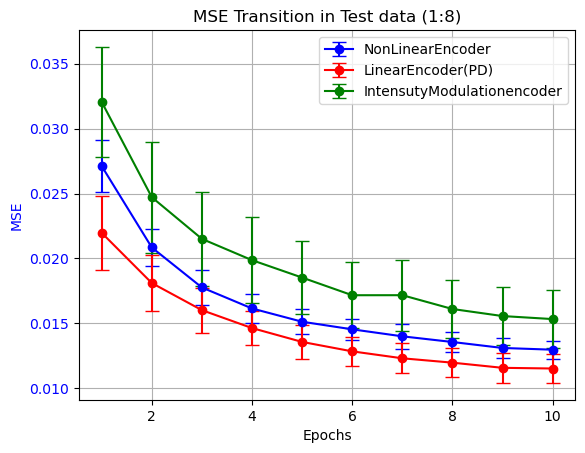

In [5]:
#12/28

#---------------------------------------------------------------------------------
file_name1 = 'MNIST_NL1-8_list.csv'##
full_path1 = os.path.join(take_directory, file_name1)

# CSVファイルからデータを読み込む

all_loss_test1 = []
with open(full_path1, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # 行内の各要素を評価してリストに追加
        for element in row:
            try:
                data = eval(element)  # 各要素をリストとして評価
                all_loss_test1.append(data)
            except Exception as e:
                print(f"Error evaluating element: {element} -> {e}")

# データを文字列から数値リストに変換  # 文字列をリストに変換
all_loss_test1 = np.array(all_loss_test1)  # NumPy配列に変換

# 各エポックごとの平均値と標準偏差を計算
mean_loss1 = np.mean(all_loss_test1, axis=0)
std_loss1 = np.std(all_loss_test1, axis=0)

#---------------------------------------------------------------------------------

#file2
file_name2 = 'MNIST_L_PD1-8_list.csv'##
full_path2 = os.path.join(take_directory, file_name2)

# CSVファイルからデータを読み込む
all_loss_test2 = []
with open(full_path2, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # 行内の各要素を評価してリストに追加
        for element in row:
            try:
                data = eval(element)  # 各要素をリストとして評価
                all_loss_test2.append(data)
            except Exception as e:
                print(f"Error evaluating element: {element} -> {e}")

# データを文字列から数値リストに変換  # 文字列をリストに変換
all_loss_test2 = np.array(all_loss_test2)  # NumPy配列に変換


# 各エポックごとの平均値と標準偏差を計算
mean_loss2 = np.mean(all_loss_test2, axis=0)
std_loss2 = np.std(all_loss_test2, axis=0)

#-------------------------------------------------------------------------------------

#file2
file_name3 = 'MNIST_CIM1-8_list.csv'##
full_path3 = os.path.join(take_directory, file_name3)

# CSVファイルからデータを読み込む
all_loss_test3 = []
with open(full_path3, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        # 行内の各要素を評価してリストに追加
        for element in row:
            try:
                data = eval(element)  # 各要素をリストとして評価
                all_loss_test3.append(data)
            except Exception as e:
                print(f"Error evaluating element: {element} -> {e}")

# データを文字列から数値リストに変換  # 文字列をリストに変換
all_loss_test3 = np.array(all_loss_test3)  # NumPy配列に変換


# 各エポックごとの平均値と標準偏差を計算
mean_loss3 = np.mean(all_loss_test3, axis=0)
std_loss3 = np.std(all_loss_test3, axis=0)

#-------------------------------------------------------------------------------------

# グラフの描画
epochs = range(1, len(mean_loss1) + 1)  # エポック範囲

fig, ax1 = plt.subplots()
# エラーバー付きのプロット
ax1.errorbar(
    x=epochs, y=mean_loss1, yerr=std_loss1,
    fmt='-o', color='blue', ecolor='blue', capsize=5, label='NonLinearEncoder'
)
ax1.errorbar(
    x=epochs, y=mean_loss2, yerr=std_loss2,
    fmt='-o', color='red', ecolor='red', capsize=5, label='LinearEncoder(PD)'
)
ax1.errorbar(
    x=epochs, y=mean_loss3, yerr=std_loss3,
    fmt='-o', color='green', ecolor='green', capsize=5, label='IntensutyModulationencoder'
)


# グラフのラベルとタイトルの設定
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.title('MSE Transition in Test data (1:8)')
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()